<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_tasks/blob/main/1_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка проблеми

Цей підручник базується на практичному та кодовому підході. Ми визначимо терміни _машинне навчання_ та _лінійна регресія_ в контексті проблеми, а потім узагальнимо їх визначення. Ми пройдемо крок за кроком через типову проблему машинного навчання:


> **ПИТАННЯ**: Компанія ACME Insurance Inc. пропонує доступне медичне страхування тисячам клієнтів по всіх Сполучених Штатах. Як головний дата-сайентіст в ACME, **вам доручено створити автоматизовану систему для оцінки річних медичних витрат для нових клієнтів**, використовуючи інформацію, таку як їх вік, стать, ІМТ, діти, звички щодо куріння та регіон проживання.
>
> Оцінки з вашої системи будуть використовуватися для визначення річної страхової премії (сума, що сплачується щомісяця) пропонованої клієнту. Через регулятивні вимоги, ви повинні мати змогу пояснити, чому ваша система видає певний прогноз.
>
> Вам надано [CSV файл](https://drive.google.com/file/d/13UBFUbkaqccMc4WFHs60tzndCyTOWGE_/view?usp=sharing), що містить перевірені історичні дані, які складаються з вищезгаданої інформації та фактичних медичних витрат, здійснених понад 1300 клієнтами.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Джерело набору даних: https://github.com/stedy/Machine-Learning-with-R-datasets


**ВПРАВА 1**: Перед тим як продовжувати, зупиніться на мить і подумайте, як ви можете підійти до цієї проблеми. Запишіть п'ять або більше ідей, які приходять вам на думку нижче:

1. Перевірити чи немає відсутніх даних, якщо є - розібратися з цим
2. Подивитися на розподіл і наявність викидів
3. Визначити, які фактори найбільше впливають на суму виплати
4. Замінити категоріальні дані на числові
5. Почати з побудови найпростішої моделі - лінійної регресії
Перевірити метрики і за потреби підібрати більш точну модель

## Завантаження даних

Для початку, давайте завантажимо дані з файлу csv.

In [1]:
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#'/content/drive/MyDrive/ML Intensive from 0 to Hero/medical-charges.csv'

In [4]:
#!ls 'drive/MyDrive/ML Intensive from 0 to Hero'

In [5]:
#file_name = 'drive/MyDrive/ML Intensive from 0 to Hero/medical-charges.csv'

In [6]:
#medical_df = pd.read_csv(file_name)

In [7]:
medical_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')

In [8]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Набір даних містить 1338 рядків та 7 стовпців. Кожен рядок набору даних містить інформацію про одного клієнта.

Наша мета - знайти спосіб оцінки значення в стовпці "charges", використовуючи значення в інших стовпцях. Якщо ми можемо це зробити для історичних даних, то ми повинні змогти оцінити вартість для нових клієнтів, просто запитавши інформацію, таку як їх вік, стать, ІМТ, кількість дітей, звички щодо куріння та регіон.

Давайте перевіримо тип даних для кожного стовпця.

In [9]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Схоже, що "вік", "діти", "ІМТ" ([індекс маси тіла](https://en.wikipedia.org/wiki/Body_mass_index)) та "платежі" є числами, тоді як "стать", "курець" та "регіон" є рядками (можливо, категоріями). Жоден з стовпців не містить пропущених значень, що економить нам чимало часу!

Про те, як можна заповнювати пропущені дані і чому це варто робити - розповідаю на великому курсі, а для тих, хто хоче розібратись прямо зараз рекомендую [статтю](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) .

Глянемо статистику для числових стовпців:

In [10]:
medical_df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


Діапазони значень в числових стовпцях також здаються розумними (немає від'ємного віку!), тому нам може не довестися робити багато очищення даних або корекції. Однак стовпець "charges" здається значно спотвореним, оскільки медіана (50 перцентиль) набагато нижча за максимальне значення.

> **ВПРАВА 2**: Які інші висновки ви можете зробити, переглядаючи таблицю вище? Додайте свої висновки нижче:
>
> 1. *Вік від 18 до 64 років, половина менше 39 років, що відповідає віку працюючого населення*
> 2. *Індекс маси тіла від майже 16 до 53 має значну різницю у вазі, яка в свою чергу може суттєво впливати на здоров'я. При чому середнє значення 30 теж відповідає за наявність зайвої ваги*
> 3. *Наявність дітей від 0 до 5 цілком реалістична, при чому мінімум чверть не має дітей.*
> 4. *Середнє значення віку, індексу маси тіла та наявності дітей збігається з медіаною.*
> 5. *Стовпець "charges": середнє значення знаходиться між 50 і 75 перцентилями,занадто велике максимальне значення можна перевірити 98%-99% або графічно.*

## Дослідницький аналіз та візуалізація з plotly

Давайте дослідимо дані, візуалізуючи розподіл значень у деяких стовпцях набору даних, а також взаємозв'язки між "витратами" та іншими стовпцями.

В машинному навчанні найчастіше використовують бібліотеки Matplotlib, Seaborn та Plotly для візуалізації. І ми теж будемо працювати з ними. Аби отримати інтро про те, як ними користуватись - рекомендую наступні ресурси Ознайомтеся з цими посібниками, щоб дізнатися, як використовувати ці бібліотеки:

- https://matplotlib.org/stable/users/explain/quick_start.html
- https://plotly.com/python/getting-started/

Але навіть якщо ви ніколи не користувались цими існтрументами - це не біда. Просто робіть за мною за аналогією і ви вже будете будувати найнеобхіжніші графіки. А в роботі можете просто потім скопіювати код звідси 😉

Спочатку імпортуємо всі лібки. Зазвичай ми їх імпортуємо саме в такий спосіб, це зручно для подальшого використання.

In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Наступні налаштування допоможуть покращити стандартний стиль та розміри шрифтів для наших діаграм. Налаштування за замовченням - теж норм. Справа смаку.

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Вік

Вік - це числова колонка. Мінімальний вік в наборі даних - 18 років, а максимальний - 64 роки. Таким чином, ми можемо візуалізувати розподіл віку, використовуючи гістограму з 47 бінами (один на кожен рік) та ящик з вусами. Ми використаємо plotly для створення інтерактивної діаграми, але ви можете створити подібні діаграми, використовуючи Seaborn.

Про те, які бувають графіки і коли який використовувати можна ознайомитись тут:

  https://datavizcatalogue.com/

In [13]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [14]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

Розподіл віку в наборі даних майже рівномірний, з 20-30 клієнтами на кожен вік, за винятком 18 та 19 років, де здається, що клієнтів більше ніж у два рази порівняно з іншими віками. Рівномірний розподіл може виникнути через те, що немає великої варіації в [кількості людей певного віку](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (між 18 та 64 роками) в США.

> **ВПРАВА 3**: Чи можете ви пояснити, чому клієнтів віком 18 та 19 років більше ніж у два рази порівняно з іншими віками?
>
> *Можливо в страховій компанії останні два роки почала діяти нова програма по залученню повнолітніх клієнтів.*

### Індекс маси тіла

Давайте подивимося на розподіл ІМТ (Індексу маси тіла) клієнтів, використовуючи гістограму та ящик з вусами.

In [15]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

Вимірювання індексу маси тіла, здається, формують [гауссівський розподіл](https://en.wikipedia.org/wiki/Normal_distribution), центрований навколо значення 30, з кількома викидами вправо. Ось як можна інтерпретувати значення ІМТ ([джерело](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

> **ВПРАВА 4**: Чи можете ви пояснити, чому розподіл віків формує рівномірний розподіл, а розподіл ІМТ формує гауссовий розподіл?

> *Розподіл віку відповідає релевантній вибірці відповідно до розподілу по віку в країні.*

> *На ІМТ впливає багато чинників та незалежних факторів: генетика, фізична активність, харчування, стан здоров'я, соціально-економічний статус та ін. За законом великих чисел та центральною граничною теоремою розподіл такого показника наближається до нормального.*



### Збори

Давайте візуалізуємо розподіл "зборів", тобто річних медичних витрат для клієнтів. Це колонка, яку ми намагаємося передбачити. Також використовуймо категоріальну колонку "курець", щоб відрізнити збори для курців та некурців.

In [16]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Ми можемо зробити наступні спостереження з вищенаведеного графіку:

* Для більшості клієнтів річні медичні витрати становлять менше \$10,000. Тільки невелика частина клієнтів має вищі медичні витрати, можливо, через нещасні випадки, серйозні хвороби та генетичні захворювання. Розподіл слідує "закону потужності"
* Існує значна різниця в медичних витратах між курцями та некурцями. Тоді як медіана для некурців становить \$7300, медіана для курців наближається до \$35,000.


> **ВПРАВА 5**: Візуалізуйте розподіл медичних витрат у зв'язку з іншими факторами, такими як "стать" та "регіон". Що ви спостерігаєте?

In [17]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['red', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

*Медіанні значення витрат для жінок та чоловіків збігаються, високі витрати для чоловіків зустрічаються частіше, ніж для жінок.*

In [18]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['orange', 'red', 'blue', 'green'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

*Медіанні значення для різних районів досить близькі, підвищені витрати найбільші в південно-східному регіоні, найменші в південно-західному.*

### Курець

Давайте візуалізуємо розподіл колонки "курець" (що містить значення "так" та "ні") за допомогою гістограми.

In [19]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [20]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

Виглядає, що лише 20% клієнтів повідомили, що вони курять. Маючи якусь нац статистику щодо куріння ми б могли порівняти це з даними.Чи можете ви перевірити, чи відповідає це національному середньому, припускаючи, що дані були зібрані у 2010 році? Ми також бачимо, що куріння здається більш поширеним звичкам серед чоловіків. Чи можете ви це підтвердити?

> **ВПРАВА 6**: Візуалізуйте розподіл стовпців "стать", "регіон" та "діти" та описуйте свої спостереження.

In [21]:
px.histogram(medical_df, x='children', color='region', title='Children')

In [22]:
px.histogram(medical_df, x='region', color='sex', title='Region')

*Розподіл кількості дітей а також статі по регіонам виглядають рівномірними.*

Після того, як ми розглянули окремі стовпці, тепер можемо візуалізувати взаємозв'язок між "витратами" (значенням, яке ми хочемо прогнозувати) та іншими стовпцями.

### Вік та витрати

Давайте візуалізуємо взаємозв'язок між "віком" та "витратами", використовуючи діаграму розсіювання. Кожна точка на діаграмі розсіювання представляє одного клієнта. Ми також використаємо значення у стовпці "курець" для кольору точок.

In [23]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Ми можемо зробити наступні висновки з вищенаведеної діаграми:

* Загальна тенденція, здається, полягає в тому, що медичні витрати зростають з віком, як ми могли б очікувати. Однак, є значна варіативність на кожному віці, і очевидно, що вік від самого себе не може бути використаний для точного визначення медичних витрат.


* Ми можемо побачити три "кластери" точок, кожен з яких, здається, формує лінію зі зростаючим нахилом:

     1. Перший і найбільший кластер складається, головним чином, з "здорових некурців", які мають відносно низькі медичні витрати порівняно з іншими.
     
     2. Другий кластер містить суміш курців і некурців. Можливо, це насправді два різних, але перекриваються кластери: "некурці з медичними проблемами" та "курці без серйозних медичних проблем".
     
     3. Останній кластер складається виключно з курців, очевидно, курців з серйозними медичними проблемами, які, можливо, пов'язані або погіршені курінням.
     

> **ВПРАВА 7**: Які інші висновки ви можете зробити з вищенаведеної діаграми?
>
>* Можна дослідити, які саме дані потрапили в другий кластер, та що спричинило підвищення витрат для некурців, та сниження витрат для курців.*

### Індекс маси тіла та витрати

Давайте візуалізуємо відношення між ІМТ (індексом маси тіла) та витратами, використовуючи ще один діаграму розсіювання. Ще раз використаємо значення з колонки "курець" для кольору точок.

In [27]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Здається, що для некурців збільшення ІМТ не здається пов'язаним зі збільшенням медичних витрат. Однак медичні витрати, здається, значно вищі для курців з ІМТ більше 30.

Які інші висновки ви можете зробити з вищенаведеного графіка?

*Сам по собі ІМТ не є фактором підвищення витрат, але саме підвищений ІМП + куріння збільшує медичні витрати в кілька разів.*

> **ВПРАВА 8**: Створіть ще декілька графіків для візуалізації зв'язку між стовпцем "charges" та іншими стовпцями ("children", "sex", "region" та "smoker"). Підсумуйте висновки, отримані з цих графіків.
>
> *Підказка*: Використовуйте графіки-скрипки (`px.violin`) та стовпчасті діаграми (`sns.barplot`)

In [25]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
fig = px.violin(medical_df, y="charges", x="children", color="smoker", box=True, points="all",
          hover_data=medical_df.columns)
fig.show()

In [ ]:
medical_df.groupby(['smoker', 'children']).agg({'children':'count', 'charges':'mean'})

children       charges
smoker children                        
no     0              459   7611.793335
       1              263   8303.109350
       2              185   9493.093674
       3              118   9614.519391
       4               22  12121.344408
       5               17   8183.845556
yes    0              115  31341.363954
       1               61  31822.654334
       2               55  33844.235755
       3               39  32724.915268
       4                3  26532.276933
       5                1  19023.260000

<Axes: xlabel='children', ylabel='charges'>

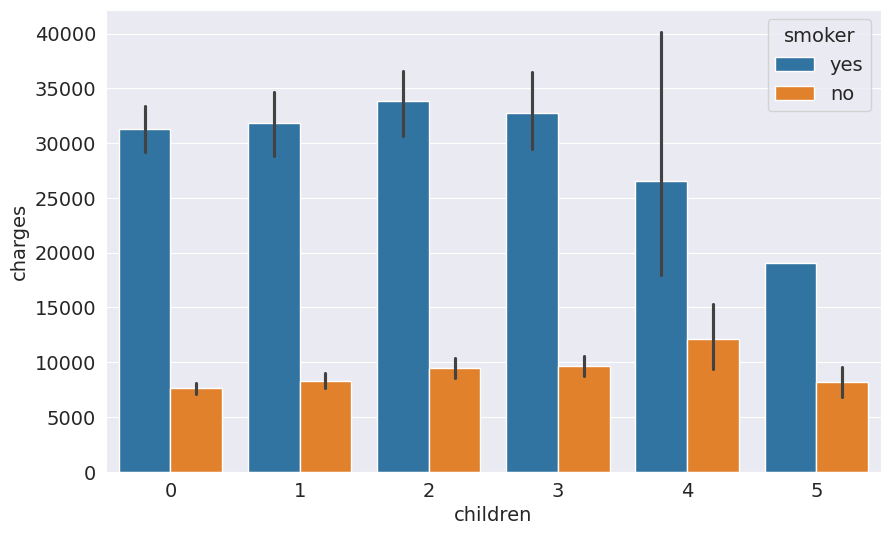

In [ ]:
sns.barplot(medical_df, x="children", y="charges", hue="smoker")

*Сама по собі кількість дітей несуттєво пливає на витрати порівняно з тим чи палять батьки.*

<Axes: xlabel='sex', ylabel='charges'>

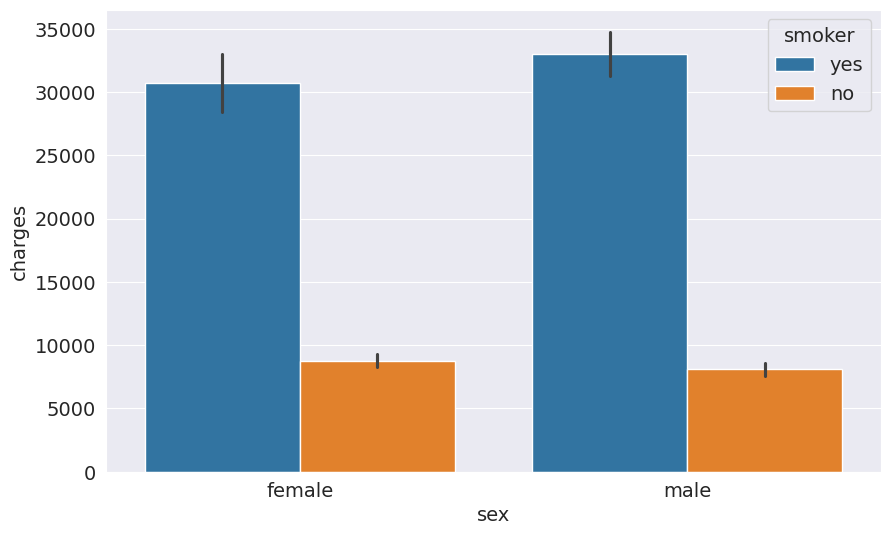

In [ ]:
sns.barplot(medical_df, x="sex", y="charges", hue="smoker")

*Для жінок-курців витрати вище, ніж для чоловіків.*

<Axes: xlabel='region', ylabel='charges'>

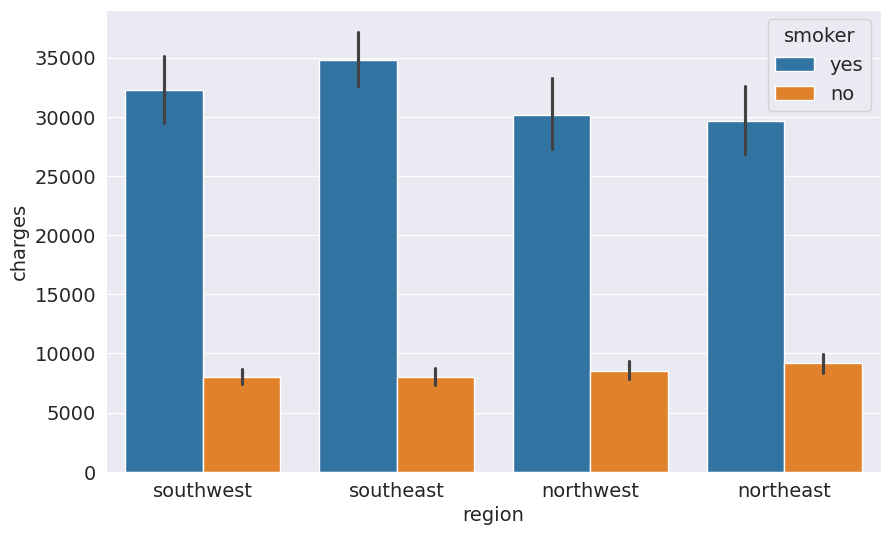

In [ ]:
sns.barplot(medical_df, x="region", y="charges", hue="smoker")

*В південно-східному регіоні витрати для курців найбільші порівняно з іншими регіонами.*

### Кореляція

Як ви можете бачити з аналізу, значення в деяких стовпцях більш тісно пов'язані зі значеннями в "charges" порівняно з іншими стовпцями. Наприклад, "age" та "charges" здається ростуть разом, тоді як "bmi" та "charges" - ні.

Цей зв'язок часто виражається числово за допомогою міри, яка називається _коефіцієнтом кореляції_, який можна обчислити за допомогою методу `.corr` серії Pandas.

In [30]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [31]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

Щоб обчислити кореляцію для категоріальних стовпців, їх спочатку потрібно перетворити на числові стовпці.

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

Ось як можна інтерпретувати коефіцієнти кореляції ([джерело](https://statisticsbyjim.com/basics/correlations)):

* **Сила**: Чим більше абсолютне значення коефіцієнта кореляції, тим сильніше відношення.

    * Крайні значення -1 та 1 вказують на ідеально лінійне відношення, коли зміна однієї змінної супроводжується абсолютно стабільною зміною іншої. Для цих відношень усі точки даних розташовані на лінії. На практиці ви не побачите жодного типу ідеального відношення.

    * Коефіцієнт нуля представляє відсутність лінійного відношення. Коли одна змінна збільшується, інша змінна не має тенденції збільшуватися або зменшуватися.
    
    * Коли значення знаходиться між 0 та +1/-1, існує відношення, але точки не всі розташовані на лінії. Як r наближається до -1 або 1, сила відношення збільшується, і точки даних схильні розташовуватися ближче до лінії.


* **Напрямок**: Знак коефіцієнта кореляції представляє напрямок відношення.

    * Позитивні коефіцієнти вказують на те, що коли значення однієї змінної збільшується, значення іншої змінної також має тенденцію збільшуватися. Позитивні відношення створюють підйомний нахил на діаграмі розсіювання.
    
    * Негативні коефіцієнти представляють випадки, коли при збільшенні значення однієї змінної, значення іншої змінної має тенденцію зменшуватися. Негативні відношення створюють спадний нахил.

Ось таке ж відношення, виражене візуально ([джерело](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Коефіцієнт кореляції має наступну формулу:

<img src="https://i.imgur.com/unapugP.png" width="360">

Ви можете дізнатися більше про математичне визначення та геометричну інтерпретацію кореляції тут: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes також надає метод `.corr` для обчислення коефіцієнтів кореляції між усіма парами числових стовпців.

In [ ]:
?medical_df.corr

In [32]:
medical_df.corr(numeric_only=True).round(3)

,age,bmi,children,charges
age,1.000,0.109,0.042,0.299
bmi,0.109,1.000,0.013,0.198
children,0.042,0.013,1.000,0.068
charges,0.299,0.198,0.068,1.000


Результат `.corr` називається матрицею кореляції і часто візуалізується за допомогою теплової карти.

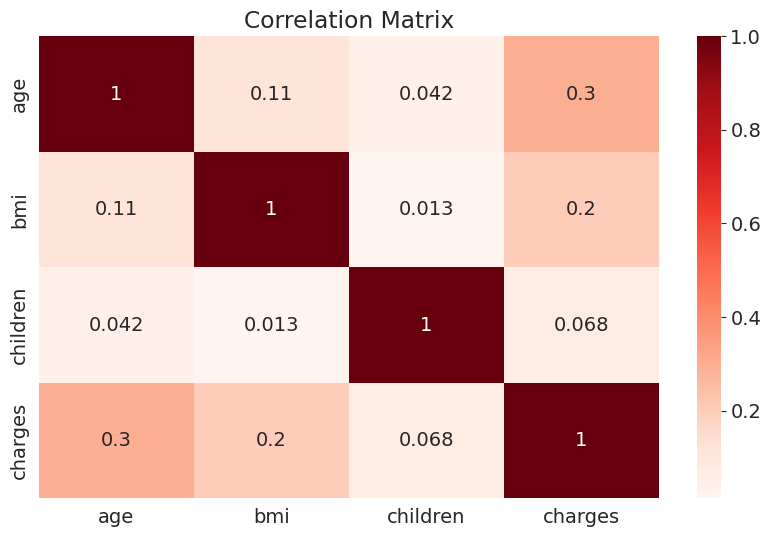

In [33]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

**Correlation vs Causality:** Зверніть увагу, що висока кореляція не може бути використана для інтерпретації причинно-наслідкового зв'язку між характеристиками. Дві характеристики $X$ та $Y$ можуть бути корельовані, якщо $X$ спричиняє $Y$ або якщо $Y$ спричиняє $X$, або якщо обидва незалежно спричинені якимось іншим фактором $Z$, і кореляція більше не буде вірною, якщо один з причинно-наслідкових зв'язків порушено. Також можливо, що $X$ та $Y$ просто здаються корельованими, тому що вибірка занадто мала.

Хоча це може здатися очевидним, комп'ютери не можуть відрізнити кореляцію від причинності, і рішення, прийняті на основі автоматизованої системи, часто можуть мати великі наслідки для суспільства, тому важливо вивчати, чому автоматизовані системи призводять до певного результату. Визначення причинно-наслідкових зв'язків вимагає людського розуміння.